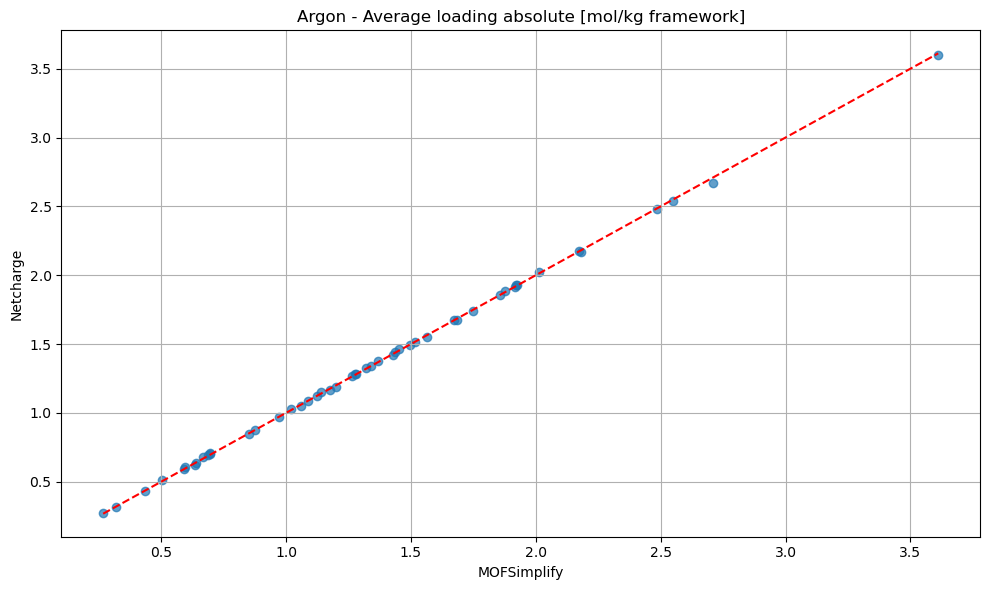

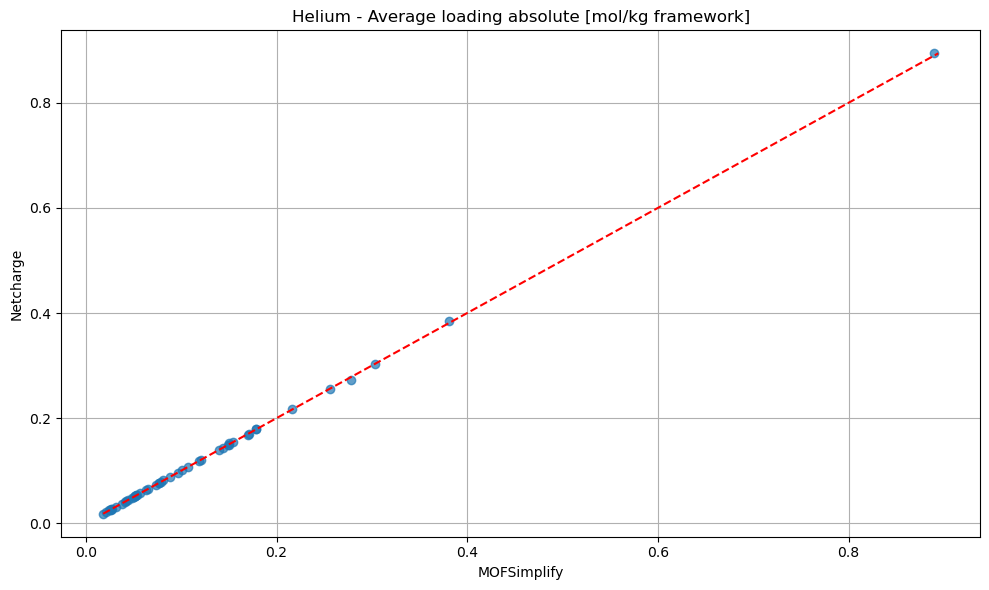

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로 설정
base_path = "./Ar_298K_50mofs_5bar/"
ar_mofsimplify_path = os.path.join(base_path, "MOFSimplify/07result.csv")
ar_netcharge_path = os.path.join(base_path, "netcharge/07result.csv")

he_base_path = "./He_298K_50mofs_5bar/"
he_mofsimplify_path = os.path.join(he_base_path, "MOFSimplify/07result.csv")
he_netcharge_path = os.path.join(he_base_path, "netcharge/07result.csv")

# CSV 파일 읽기
ar_mofsimplify_df = pd.read_csv(ar_mofsimplify_path)
ar_netcharge_df = pd.read_csv(ar_netcharge_path)
he_mofsimplify_df = pd.read_csv(he_mofsimplify_path)
he_netcharge_df = pd.read_csv(he_netcharge_path)

# 필요한 열만 추출 및 이름 변경
ar_mofsimplify_df = ar_mofsimplify_df[["name", "Average loading absolute [mol/kg framework]"]].rename(
    columns={"Average loading absolute [mol/kg framework]": "MOFSimplify"}
)
ar_netcharge_df = ar_netcharge_df[["name", "Average loading absolute [mol/kg framework]"]].rename(
    columns={"Average loading absolute [mol/kg framework]": "Netcharge"}
)
he_mofsimplify_df = he_mofsimplify_df[["name", "Average loading absolute [mol/kg framework]"]].rename(
    columns={"Average loading absolute [mol/kg framework]": "MOFSimplify"}
)
he_netcharge_df = he_netcharge_df[["name", "Average loading absolute [mol/kg framework]"]].rename(
    columns={"Average loading absolute [mol/kg framework]": "Netcharge"}
)

# 이름 기준 병합
ar_df = pd.merge(ar_mofsimplify_df, ar_netcharge_df, on="name")
he_df = pd.merge(he_mofsimplify_df, he_netcharge_df, on="name")

# 시각화 함수 정의
def plot_comparison(df, gas_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(df["MOFSimplify"], df["Netcharge"], alpha=0.7)
    
    min_val = min(df["MOFSimplify"].min(), df["Netcharge"].min())
    max_val = max(df["MOFSimplify"].max(), df["Netcharge"].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    plt.xlabel("MOFSimplify")
    plt.ylabel("Netcharge")
    plt.title(f"{gas_name} - Average loading absolute [mol/kg framework]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 시각화 실행
plot_comparison(ar_df, "Argon")
plot_comparison(he_df, "Helium")
